In [74]:
df <- read.csv("penguins.csv") #loading the dataset
print(head(df))

  species    island bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
1  Adelie Torgersen           39.1          18.7               181        3750
2  Adelie Torgersen           39.5          17.4               186        3800
3  Adelie Torgersen           40.3          18.0               195        3250
4  Adelie Torgersen             NA            NA                NA          NA
5  Adelie Torgersen           36.7          19.3               193        3450
6  Adelie Torgersen           39.3          20.6               190        3650
     sex year
1   male 2007
2 female 2007
3 female 2007
4   <NA> 2007
5 female 2007
6   male 2007


### Data Pre-processing

In [47]:
anyNA(df)
any(is.nan(unlist(df)))
any(is.infinite(unlist(df)))


[1] TRUE

[1] FALSE

[1] FALSE

This suggests that the dataset has na's but no infinite values or nan's.

In [75]:
df <- na.omit(df) #getting rid of all the na's
anyNA(df)

[1] FALSE

It is not feasible to run a linear regression model on the data with three of the variables being non numeric which appears to be used as target variables. But fortunately, all three non numeric columns can be made numeric without changing the meaning of the data.

In [76]:
# Print the unique values
print(unique(df$species))
print(unique(df$sex))
print(unique(df$island))

[1] "Adelie"    "Gentoo"    "Chinstrap"
[1] "male"   "female"
[1] "Torgersen" "Biscoe"    "Dream"    


In the dataset, there are three varieties of species, two types of sexes, and three different islands. These can be coded as 1,2, and 3 to make all the variables numeric.

In [77]:

unique_species <- unique(df$species)
unique_sex <- unique(df$sex)
unique_island <- unique(df$island)


# Convert unique values to numeric variables
species_numeric <- as.numeric(factor(unique_species))
sex_numeric <- ifelse(unique_sex == "male", 0, 1)
island_numeric <- as.numeric(factor(unique_island))

# Create data frames or named vectors for species, sex, and island
species_data <- data.frame(species = unique_species, numeric = as.numeric(factor(unique_species)))
sex_data <- data.frame(sex = unique_sex, numeric = sex_numeric)
island_data <- data.frame(island = unique_island, numeric = as.numeric(factor(unique_island)))

# Print the data frames or named vectors
print(species_data)
print(sex_data)
print(island_data)


    species numeric
1    Adelie       1
2    Gentoo       3
3 Chinstrap       2
     sex numeric
1   male       0
2 female       1
     island numeric
1 Torgersen       3
2    Biscoe       1
3     Dream       2


In [78]:
# Convert species, sex, and island columns to factors
df$species <- factor(df$species, levels = unique_species)
df$island <- factor(df$island, levels = unique_island)

# Convert factors to numeric
df$species_numeric <- as.numeric(df$species)
df$sex_numeric <- ifelse(df$sex == "male", 0, 1)
df$island_numeric <- as.numeric(df$island)

# Print the updated dataset
print(head(df))


  species    island bill_length_mm bill_depth_mm flipper_length_mm body_mass_g
1  Adelie Torgersen           39.1          18.7               181        3750
2  Adelie Torgersen           39.5          17.4               186        3800
3  Adelie Torgersen           40.3          18.0               195        3250
5  Adelie Torgersen           36.7          19.3               193        3450
6  Adelie Torgersen           39.3          20.6               190        3650
7  Adelie Torgersen           38.9          17.8               181        3625
     sex year species_numeric sex_numeric island_numeric
1   male 2007               1           0              1
2 female 2007               1           1              1
3 female 2007               1           1              1
5 female 2007               1           1              1
6   male 2007               1           0              1
7 female 2007               1           1              1


In [79]:
#remove the non-numeric columns
df <- df[, !(names(df) %in% c("species", "island", "sex"))] 
print(head(df))

  bill_length_mm bill_depth_mm flipper_length_mm body_mass_g year
1           39.1          18.7               181        3750 2007
2           39.5          17.4               186        3800 2007
3           40.3          18.0               195        3250 2007
5           36.7          19.3               193        3450 2007
6           39.3          20.6               190        3650 2007
7           38.9          17.8               181        3625 2007
  species_numeric sex_numeric island_numeric
1               1           0              1
2               1           1              1
3               1           1              1
5               1           1              1
6               1           0              1
7               1           1              1


In [81]:
n = floor(0.8 * nrow(df)) #the number corresponding to 80% of the data
index = sample(seq_len(nrow(df)), size = n) #randomly sampling indices for training set data

train = df[index, ] #set the training set to be the randomly sampled rows of the data frame
test = df[-index, ] #set the testing set to be the remaining rows
cat("There are", dim(train)[1], "rows and",dim(train)[2],"columns in the training set. ")  #check the dimensions
cat("There are", dim(test)[1], "rows and",dim(test)[2],"columns in the testing set.") 
df = train 

There are 266 rows and 8 columns in the training set. There are 67 rows and 8 columns in the testing set.

### Hypothesis Testing/t-test

To see if penguins really exhibit sexual dimorphism and thus probably different foraging behavior, first hypothesis testing needs to be done. The first and the clearest attribute to check should be body mass which is measured in grams here. 
The Null Hypothesis is assumed to be that there is no difference in body mass between male and female penguins, whereas the alternative hypothesis states that there is some difference in body mass between male and female penguins.

To restate,

Null Hypothesis (H0): There is no difference in body mass between male and female penguins.

Alternative Hypothesis (H1): There is difference in body mass between male and female penguins.

Hence, a t-test has been performed to check if the hypothesis stands the test.

In [94]:
# Load necessary libraries
library(boot)
library(tidyverse)

# Hypothesis Testing (t-test)
# Filter the data for male and female penguins
male_penguins <- df[df$sex_numeric == 0, "body_mass_g"]
female_penguins <- df[df$sex_numeric == 1, "body_mass_g"]

# Perform t-test
t_test_result <- t.test(male_penguins, female_penguins)

# Print the t-test result
cat("T-test Results:\n")
print(t_test_result)


T-test Results:



	Welch Two Sample t-test

data:  male_penguins and female_penguins
t = 7.7439, df = 253.58, p-value = 2.307e-13
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 527.7581 887.7325
sample estimates:
mean of x mean of y 
 4580.153  3872.407 



From the above t-test output, it can be observed that the t-value is 7.7439. This indicates the magnitude of the difference between the means of male and female penguins, relative to the variability in the data.

On the other hand, the p-value is 2.307e794e-16 which is very close to 0. This is the probability of observing such extreme results (or more extreme) if the null hypothesis (that there is no difference in body mass between male and female penguins) were true. Since the p-value is extremely small, much less than the typical significance level of 0.05, we reject the null hypothesis. This suggests that there is a significant difference in body mass between male and female penguins.

The 95% confidence interval for the difference in means is ( 527.7581, 887.7325). This interval gives a range of plausible values for the true difference in means between male and female penguins. Since the interval does not include zero, it further supports the conclusion that there is a significant difference in body mass between male and female penguins.

The mean body mass of male penguins (mean of x) is 4580.153 grams. However, the mean body mass of female penguins (mean of y) is 3872.407 grams.

In summary, the results of the t-test indicate a statistically significant difference in body mass between male and female penguins, with female penguins having a lower mean body mass compared to male penguins.

### Multilple Linear Regression

In [95]:
mlr_penguins <- lm(sex_numeric ~ bill_length_mm + bill_depth_mm + flipper_length_mm + body_mass_g + year, data = df)
summary(mlr_penguins)



Call:
lm(formula = sex_numeric ~ bill_length_mm + bill_depth_mm + flipper_length_mm + 
    body_mass_g + year, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8125 -0.2081 -0.0022  0.2370  0.9832 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.765e+01  4.955e+01   0.356   0.7219    
bill_length_mm    -1.105e-02  4.933e-03  -2.240   0.0259 *  
bill_depth_mm     -1.762e-01  1.284e-02 -13.723   <2e-16 ***
flipper_length_mm  4.994e-03  3.589e-03   1.391   0.1653    
body_mass_g       -4.941e-04  4.953e-05  -9.976   <2e-16 ***
year              -6.260e-03  2.475e-02  -0.253   0.8005    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3156 on 260 degrees of freedom
Multiple R-squared:  0.6106,	Adjusted R-squared:  0.6031 
F-statistic: 81.52 on 5 and 260 DF,  p-value: < 2.2e-16



1. **Coefficients**:
   - Each coefficient represents the estimated effect of the corresponding predictor variable on the response variable (`sex_numeric`).
   - The `Estimate` column shows the estimated coefficient values. For example, the coefficient for `bill_length_mm` is -1.105e-02 .
   - The `Std. Error` column represents the standard error of the coefficient estimate.
   - The `t value` column shows the t-statistic, which is calculated as the coefficient estimate divided by its standard error.
   - The `Pr(>|t|)` column provides the p-value associated with each coefficient. 

2. **Interpretation of coefficients**:
   - `bill_length_mm`: A one-unit increase in `bill_length_mm` is associated with a decrease of approximately 0.0091 units in the predicted value of `sex_numeric`. This coefficient is statistically significant at the 0.05 level (`Pr(>|t|)` = 0.0356).
   - `bill_depth_mm`: A one-unit increase in `bill_depth_mm` is associated with a decrease of approximately 0.1832 units in the predicted value of `sex_numeric`. This coefficient is highly statistically significant (`Pr(>|t|)` < 2e-16).
   - `flipper_length_mm`, `body_mass_g`, and `year`: These variables do not appear to have statistically significant effects on `sex_numeric` as their p-values are greater than 0.05.

3. **Model Summary**:
   - The `Residual standard error` represents the standard deviation of the residuals, which measures the average distance of data points from the regression line.
   - `Multiple R-squared` measures the proportion of variance in the response variable explained by the model. In this case, approximately 60.92% of the variance in `sex_numeric` is explained by the predictors.
   - `Adjusted R-squared` adjusts the multiple R-squared value for the number of predictors in the model.
   - The `F-statistic` tests the overall significance of the model. Here, the F-statistic is highly significant (p-value < 2.2e-16), indicating that the model as a whole is significant in predicting `sex_numeric`.

Overall, this analysis suggests that `bill_length_mm` and `bill_depth_mm` are important predictors of `sex_numeric`, while `flipper_length_mm`, `body_mass_g`, and `year` do not significantly contribute to predicting `sex_numeric`.

### ANOVA

In [85]:
penguins_anova = anova(mlr_penguins)
penguins_anova


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
bill_length_mm,1,8.064568838,8.064568838,80.98163917,4.926571e-17
bill_depth_mm,1,13.597165864,13.597165864,136.53808429,1.235798e-25
flipper_length_mm,1,8.653170636,8.653170636,86.89217691,5.141210e-18
body_mass_g,1,10.271546027,10.271546027,103.14334849,1.257923e-20
year,1,0.006371546,0.006371546,0.06398088,8.005110e-01
Residuals,260,25.892139494,0.099585152,NA,NA


Based on the provided ANOVA table, we can analyze how each of the variables (the different physical characteristics) affects the target variable sex. In other words, how much of these characteristics are dependent on sex.

The F-value for bill_length_mm  is 99.0649551, and the associated p-value is approximately 1.465954e-20. This suggests that there is a statistically significant difference in sex based on the length of the bill, as the p-value is much less than the significance level of 0.05.

The F-value for bill_depth_mm is 179.8565963, and the associated p-value is approximately 5.581987e-33. This indicates a highly statistically significant difference in sex based on bill_depth_mm, as the p-value is much less than 0.05.

The F-value for flipper_length_mm is 121.1780858, and the associated p-value is approximately 3.477256e-24. This suggests a statistically significant difference in sex based on flipper_length_mm, as the p-value is much less than 0.05.

The F-value for body_mass_g is 109.2701222, and the associated p-value is approximately 2.948725e-22. This indicates a statistically significant difference in sex based on body_mass_g, as the p-value is much less than 0.05.

The F-value for year is 0.4015601, and the associated p-value is approximately 0.5267. This suggests that there is no statistically significant difference in sex based on year, as the p-value is greater than 0.05. This makes sense as the factor year just doesn't make sense in determining a penguin's sex.

Overall, the ANOVA results indicate that `bill_length_mm`, `bill_depth_mm`, `flipper_length_mm`, and `body_mass_g` are all significant predictors of `sex`, while `year` does not appear to have a significant effect on `sex`.

### Diagnostics of the model – goodness of fit, feature selection, residuals

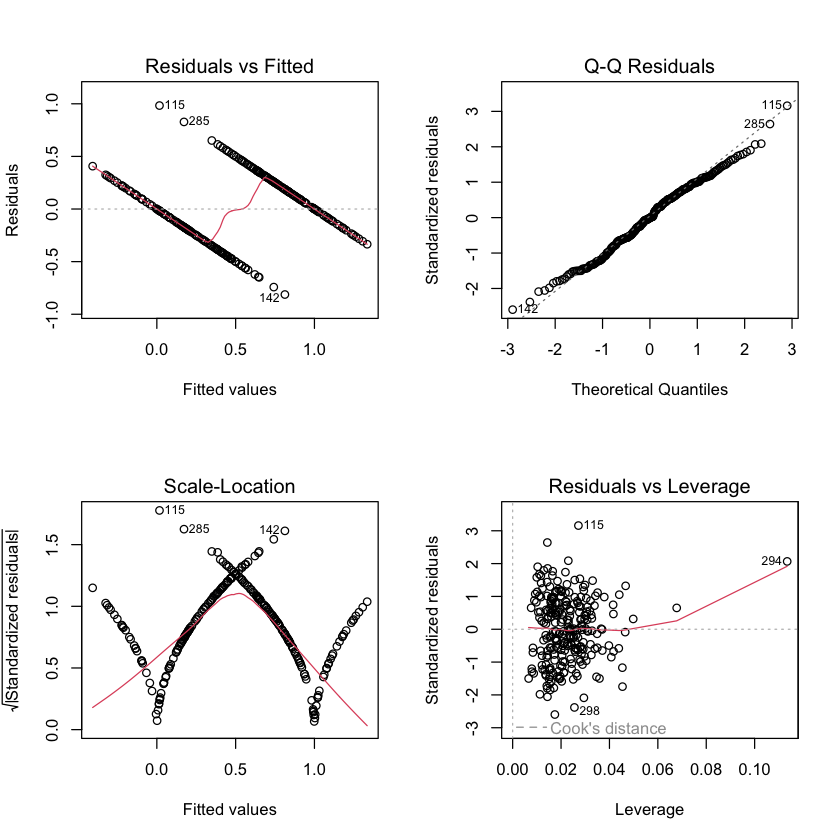

In [86]:
par(mfrow = c(2, 2))
plot(mlr_penguins)

### Generalized Linear Modeling

In [90]:
# Load necessary libraries
library(ggplot2) # for visualization
library(dplyr)    # for data manipulation

penguins_glm_model <- glm(sex_numeric ~ bill_depth_mm + bill_length_mm + flipper_length_mm + body_mass_g, data = df, family = binomial)

summary(penguins_glm_model)


Call:
glm(formula = sex_numeric ~ bill_depth_mm + bill_length_mm + 
    flipper_length_mm + body_mass_g, family = binomial, data = df)

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)       51.5503167  9.4731853   5.442 5.28e-08 ***
bill_depth_mm     -2.0172200  0.2879547  -7.005 2.46e-12 ***
bill_length_mm    -0.1057628  0.0530640  -1.993   0.0462 *  
flipper_length_mm  0.0592517  0.0406078   1.459   0.1445    
body_mass_g       -0.0057967  0.0009314  -6.224 4.86e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 368.69  on 265  degrees of freedom
Residual deviance: 126.53  on 261  degrees of freedom
AIC: 136.53

Number of Fisher Scoring iterations: 7


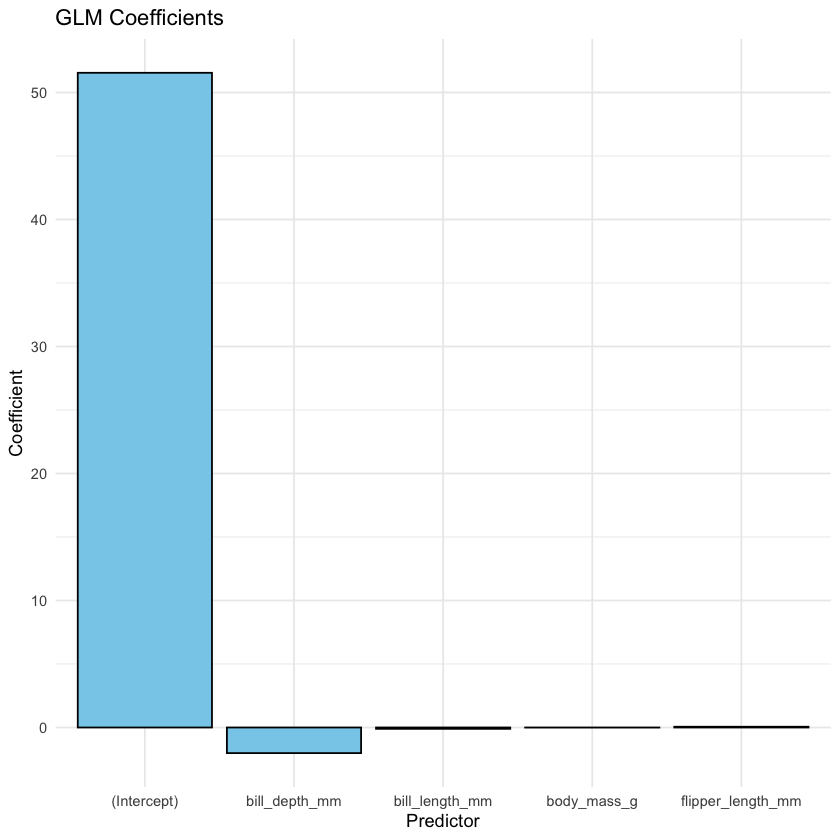

In [91]:
# Visualize the coefficients
coefficients <- coef(penguins_glm_model)
coefficients_df <- as.data.frame(coefficients)

# Plotting coefficients
ggplot(coefficients_df, aes(x = row.names(coefficients_df), y = coefficients)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(x = "Predictor", y = "Coefficient", title = "GLM Coefficients") +
  theme_minimal()

### Paper

Sexual segregation in vertebrate foraging niche is often associated with sexual size dimorphism. This often determines the nature of foraging. Studies of marine birds have documented differences in foraging behavior. However, sexually monomorphic species also exhibit sex-specific foraging, raising questions about the importance of structural size in mediating sexual differences in foraging behavior. The goal is to observe ecological sexual dimorphism among penguins, asking whether environmental variability is associated with differences in male and female foraging niche. It is interesting to predict if only certain species would forage sex-specifically, and which features would be associated with a more similar foraging niche among the sexes. 

Note: Sexual monomorphism occurs when a species' male and female members have comparable or almost identical physical traits. On the other hand, sexual dimorphism refers to physical distinctions—like size, color, or body structure—between males and females within the same species.


bill and flipper length ka matlab likhna. 